In [1]:
import matplotlib.pyplot as plt
import numpy as np
size_plot = 24 * 1.5

from utils import *

In [2]:
density_values, intgral_list, system_matrix_size = get_density_list()

# CPU_quadrule = load_cpu_stats_from_files_multi("CPUMultiThread", density_values, "quadrule.txt")
CPU_momintegrals = load_cpu_stats_from_files_sautswab("CPUMultiThread", density_values, "momintegrals_main.txt")
CPU_median, CPU_min, CPU_max, CPU_std = load_cpu_stats_from_files("GPU", density_values, "should_calc_true.txt")
GPU_median, GPU_min, GPU_max, GPU_std = load_cpu_stats_from_files("GPU", density_values, "should_calc_false.txt")

C:\Users\Ian\AppData\Local\Temp\ipykernel_13756\3480810886.py:37: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(bottom=0)


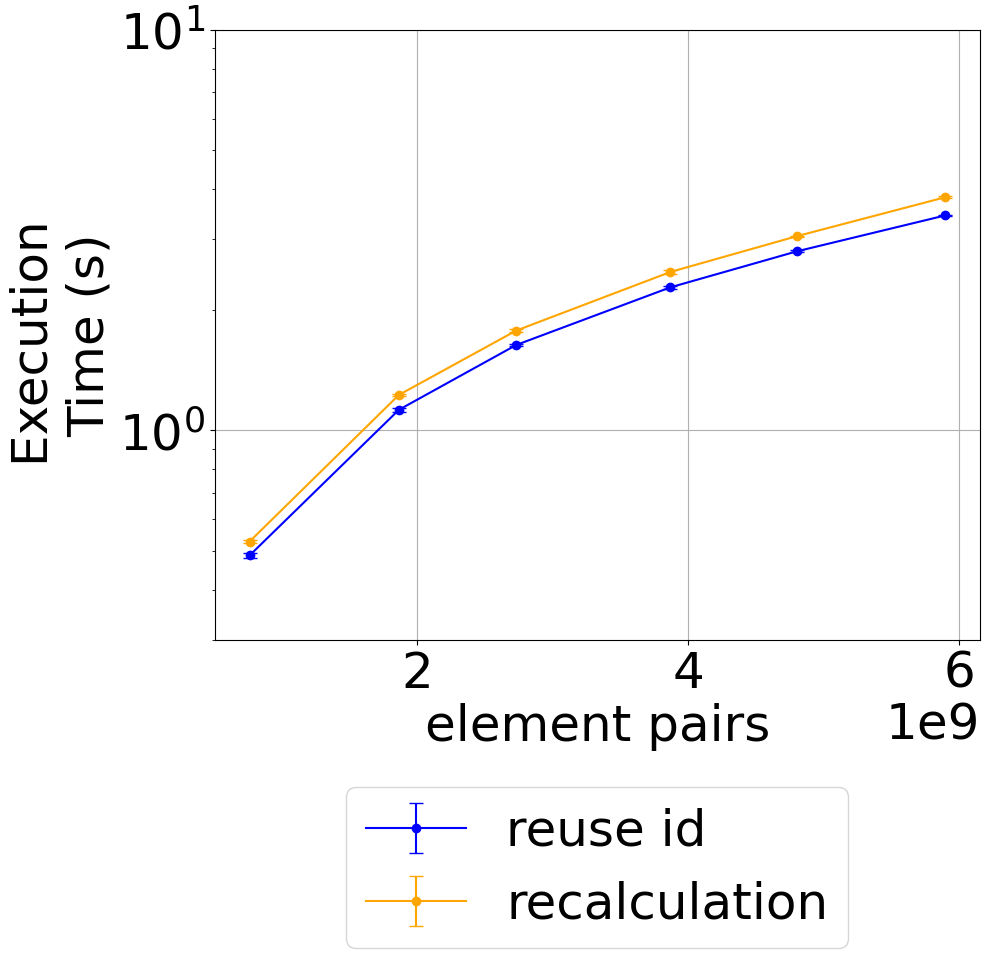

In [3]:
fig, ax = plt.subplots(figsize=(10, 10))

# Plot CPU with error bars
ax.errorbar(
    intgral_list, CPU_median, yerr=CPU_std,
    marker='o', label='reuse id', color='blue', capsize=5, linestyle='-'
)

# Plot GPU with error bars
ax.errorbar(
    intgral_list, GPU_median, yerr=GPU_std,
    marker='o', label='recalculation', color='orange', capsize=5, linestyle='-'
)

ax.set_xlabel('element pairs', fontsize=size_plot)
ax.set_ylabel('Execution \nTime (s)', fontsize=size_plot)
# ax.set_title('Execution Time vs threads', fontsize=size_plot)

ax.tick_params(axis='both', labelsize=size_plot)
ax.set_yscale('log')


fig.canvas.draw()
offset_text = ax.xaxis.get_offset_text()
offset_text.set_size(size_plot)

# ax.legend(fontsize=size_plot)
ax.legend(
    fontsize=size_plot,
    loc='upper center',
    bbox_to_anchor=(0.5, -0.2),  # centered below axis
    ncol=1,                        # spread labels into columns
    frameon=True
)

ax.set_ylim( 3e-1, 1e1)
plt.ylim(bottom=0)
ax.grid(True)
plt.tight_layout()
plt.savefig("graphs/should_calc_true_VS_false_mc.svg", format='svg')
plt.show()

C:\Users\Ian\AppData\Local\Temp\ipykernel_13756\4076044753.py:46: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(bottom=0)


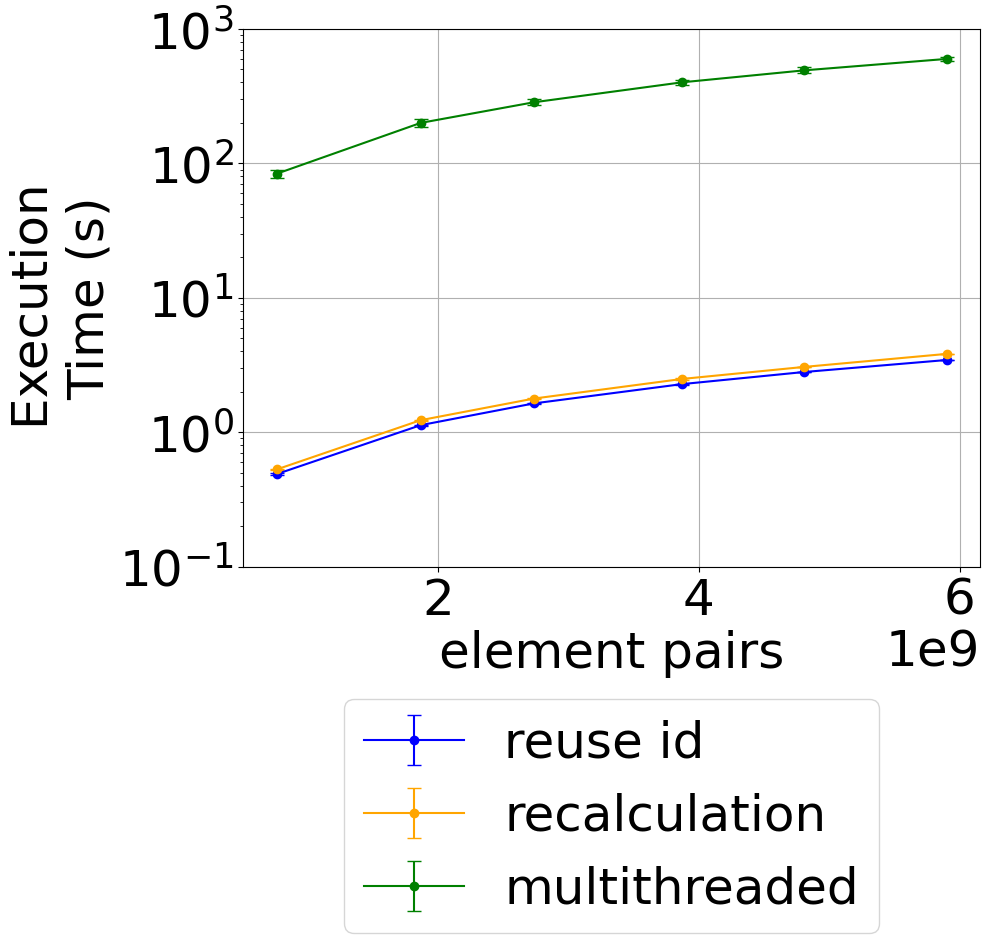

In [4]:
CPU_diff_median = np.array(CPU_momintegrals[4])
CPU_diff_std = np.array(CPU_momintegrals[3])

fig, ax = plt.subplots(figsize=(10, 10))

# Plot CPU with error bars
ax.errorbar(
    intgral_list, CPU_median, yerr=CPU_std,
    marker='o', label='reuse id', color='blue', capsize=5, linestyle='-'
)

# Plot GPU with error bars
ax.errorbar(
    intgral_list, GPU_median, yerr=GPU_std,
    marker='o', label='recalculation', color='orange', capsize=5, linestyle='-'
)

ax.errorbar(
    intgral_list, CPU_diff_median, yerr=CPU_diff_std,
    marker='o', label='multithreaded', color='green', capsize=5, linestyle='-'
)

ax.set_xlabel('element pairs', fontsize=size_plot)
ax.set_ylabel('Execution \nTime (s)', fontsize=size_plot)
# ax.set_title('Execution Time vs threads', fontsize=size_plot)

ax.tick_params(axis='both', labelsize=size_plot)
ax.set_yscale('log')


fig.canvas.draw()
offset_text = ax.xaxis.get_offset_text()
offset_text.set_size(size_plot)

# ax.legend(fontsize=size_plot)
# ax.legend(fontsize=size_plot, loc='upper left', bbox_to_anchor=(0.0, 0.35))
ax.legend(
    fontsize=size_plot,
    loc='upper center',
    bbox_to_anchor=(0.5, -0.2),  # centered below axis
    ncol=1,                        # spread labels into columns
    frameon=True
)

ax.set_ylim( 1e-1, 1e3)
plt.ylim(bottom=0)
ax.grid(True)
plt.tight_layout()
plt.savefig("graphs/should_calc_true_VS_false_and_CPU_mc.svg", format='svg')
plt.show()

C:\Users\Ian\AppData\Local\Temp\ipykernel_13756\3456270670.py:43: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(bottom=0)


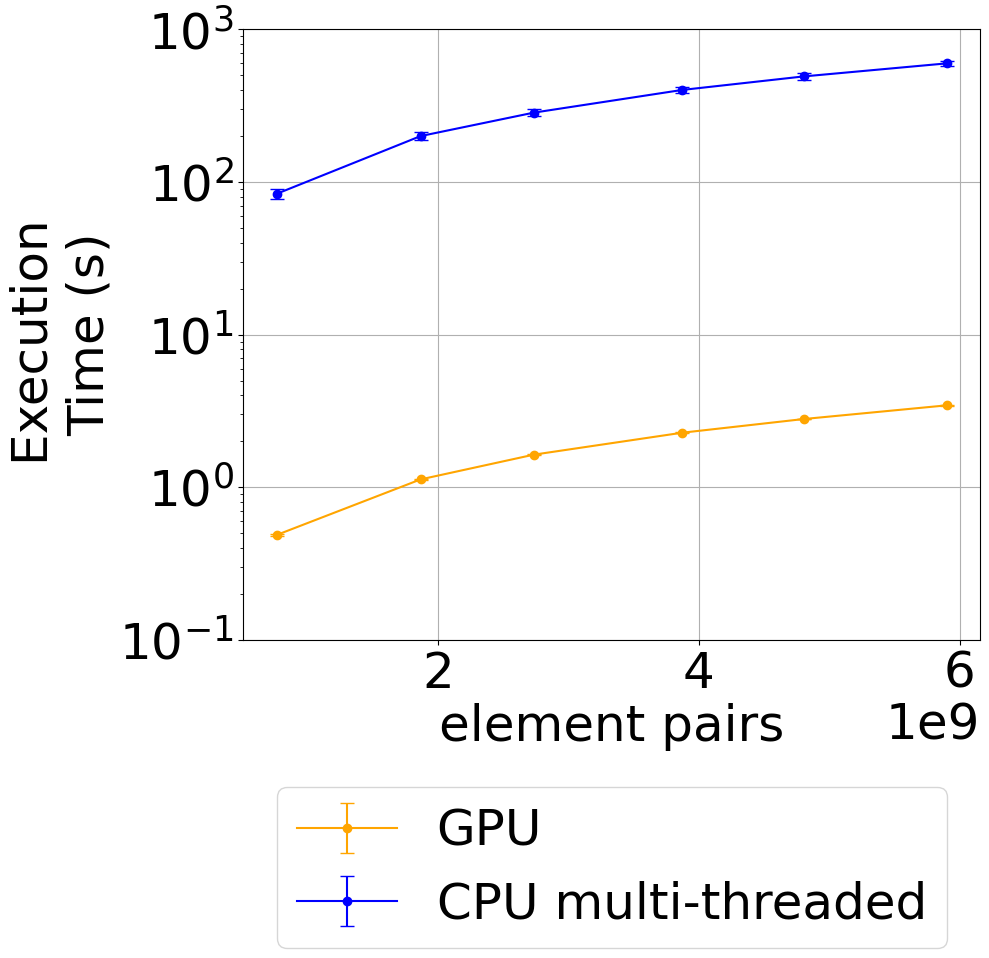

In [5]:
fig, ax = plt.subplots(figsize=(10, 10))

# Plot CPU with error bars
ax.errorbar(
    intgral_list, CPU_median, yerr=CPU_std,
    marker='o', label='GPU', color='orange', capsize=5, linestyle='-'
)

# Plot GPU with error bars
# ax.errorbar(
#     intgral_list, GPU_median, yerr=GPU_std,
#     marker='o', label='recalculation', color='orange', capsize=5, linestyle='-'
# )

ax.errorbar(
    intgral_list, CPU_diff_median, yerr=CPU_diff_std,
    marker='o', label='CPU multi-threaded', color='blue', capsize=5, linestyle='-'
)

ax.set_xlabel('element pairs', fontsize=size_plot)
ax.set_ylabel('Execution \nTime (s)', fontsize=size_plot)
# ax.set_title('Execution Time vs threads', fontsize=size_plot)

ax.tick_params(axis='both', labelsize=size_plot)
ax.set_yscale('log')


fig.canvas.draw()
offset_text = ax.xaxis.get_offset_text()
offset_text.set_size(size_plot)

# ax.legend(fontsize=size_plot)
# ax.legend(fontsize=size_plot, loc='upper left', bbox_to_anchor=(0.0, 0.35))
ax.legend(
    fontsize=size_plot,
    loc='upper center',
    bbox_to_anchor=(0.5, -0.2),  # centered below axis
    ncol=1,                        # spread labels into columns
    frameon=True
)

ax.set_ylim( 1e-1, 1e3)
plt.ylim(bottom=0)
ax.grid(True)
plt.tight_layout()
plt.savefig("graphs/should_calc_true_VS_false_and_CPU_for_EA_mc.svg", format='svg')
plt.show()

In [6]:
speedup = CPU_median / CPU_diff_median
print(speedup)

[0.00581889 0.00563093 0.00574172 0.00567748 0.00569053 0.00574636]


In [7]:
CPU_diff_median / CPU_median 

array([171.85394236, 177.59065402, 174.16372899, 176.13451471,
       175.73059928, 174.02310728])

In [15]:
import numpy as np

# element-wise rounding
result = np.round(CPU_diff_median / CPU_median, 3)
print(result)


[171.854 177.591 174.164 176.135 175.731 174.023]


In [9]:
# Example data arrays (replace with your actual ones)
# CPU_median, CPU_std = [...]
# CPU_diff_median, CPU_diff_std = [...]   # reuse id
# GPU_median, GPU_std = [...]             # on-the-fly

table_lines = []
for ep, cpu_m, cpu_s, reuse_m, reuse_s, fly_m, fly_s in zip(
    intgral_list, CPU_median, CPU_std, CPU_diff_median, CPU_diff_std, GPU_median, GPU_std
):
    slowdown = fly_m / reuse_m
    table_lines.append(
        f"{ep:.3f} & "
        f"${cpu_m:.3f} \\pm {cpu_s:.2f}$ & "
        f"${reuse_m:.3f} \\pm {reuse_s:.2f}$ & "
        f"${fly_m:.3f} \\pm {fly_s:.2e}$ & "
        f"${slowdown:.3f}\\times$ \\\\"
    )

latex_table = r"""
\begin{table}[ht]
\centering
\begin{tabular}{|c|c|c|c|c|}
\hline
\makecell{\textbf{Element Pairs}\\\textbf{(billions)}} &
\makecell{\textbf{CPU}\\\textbf{(Median$\pm$Std)(s)}} &
\makecell{\textbf{reuse id}\\\textbf{(Median$\pm$Std)(s)}} &
\makecell{\textbf{on-the-fly}\\\textbf{(Median$\pm$Std)(s)}} &
\makecell{\textbf{slowdown}} \\
\hline
""" + "\n".join(table_lines) + r"""
\hline
\end{tabular}
\end{table}
"""

print(latex_table)



\begin{table}[ht]
\centering
\begin{tabular}{|c|c|c|c|c|}
\hline
\makecell{\textbf{Element Pairs}\\\textbf{(billions)}} &
\makecell{\textbf{CPU}\\\textbf{(Median$\pm$Std)(s)}} &
\makecell{\textbf{reuse id}\\\textbf{(Median$\pm$Std)(s)}} &
\makecell{\textbf{on-the-fly}\\\textbf{(Median$\pm$Std)(s)}} &
\makecell{\textbf{slowdown}} \\
\hline
764411904.000 & $0.488 \pm 0.01$ & $83.824 \pm 6.06$ & $0.528 \pm 3.49e-03$ & $0.006\times$ \\
1866240000.000 & $1.126 \pm 0.01$ & $200.020 \pm 12.32$ & $1.227 \pm 8.07e-03$ & $0.006\times$ \\
2732361984.000 & $1.635 \pm 0.01$ & $284.696 \pm 14.72$ & $1.776 \pm 1.19e-02$ & $0.006\times$ \\
3869835264.000 & $2.277 \pm 0.02$ & $400.977 \pm 17.58$ & $2.487 \pm 2.43e-02$ & $0.006\times$ \\
4804153344.000 & $2.800 \pm 0.02$ & $492.069 \pm 25.07$ & $3.055 \pm 7.82e-03$ & $0.006\times$ \\
5898240000.000 & $3.441 \pm 0.01$ & $598.840 \pm 24.88$ & $3.820 \pm 1.78e-02$ & $0.006\times$ \\
\hline
\end{tabular}
\end{table}

